# Main Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
import sklearn.datasets
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Building Model
import tensorflow as tf
import tensorflow.keras as k

In [2]:
# Reading Data

Breast_cancer = sklearn.datasets.load_breast_cancer()

In [3]:
Breast_cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
data = pd.DataFrame(Breast_cancer.data, columns=Breast_cancer.feature_names)

In [5]:
data.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
data.shape

(569, 30)

In [7]:
data["label"] = Breast_cancer.target

In [8]:
data["label"].value_counts()

label
1    357
0    212
Name: count, dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## Data Not Have null value

# Data Visualization

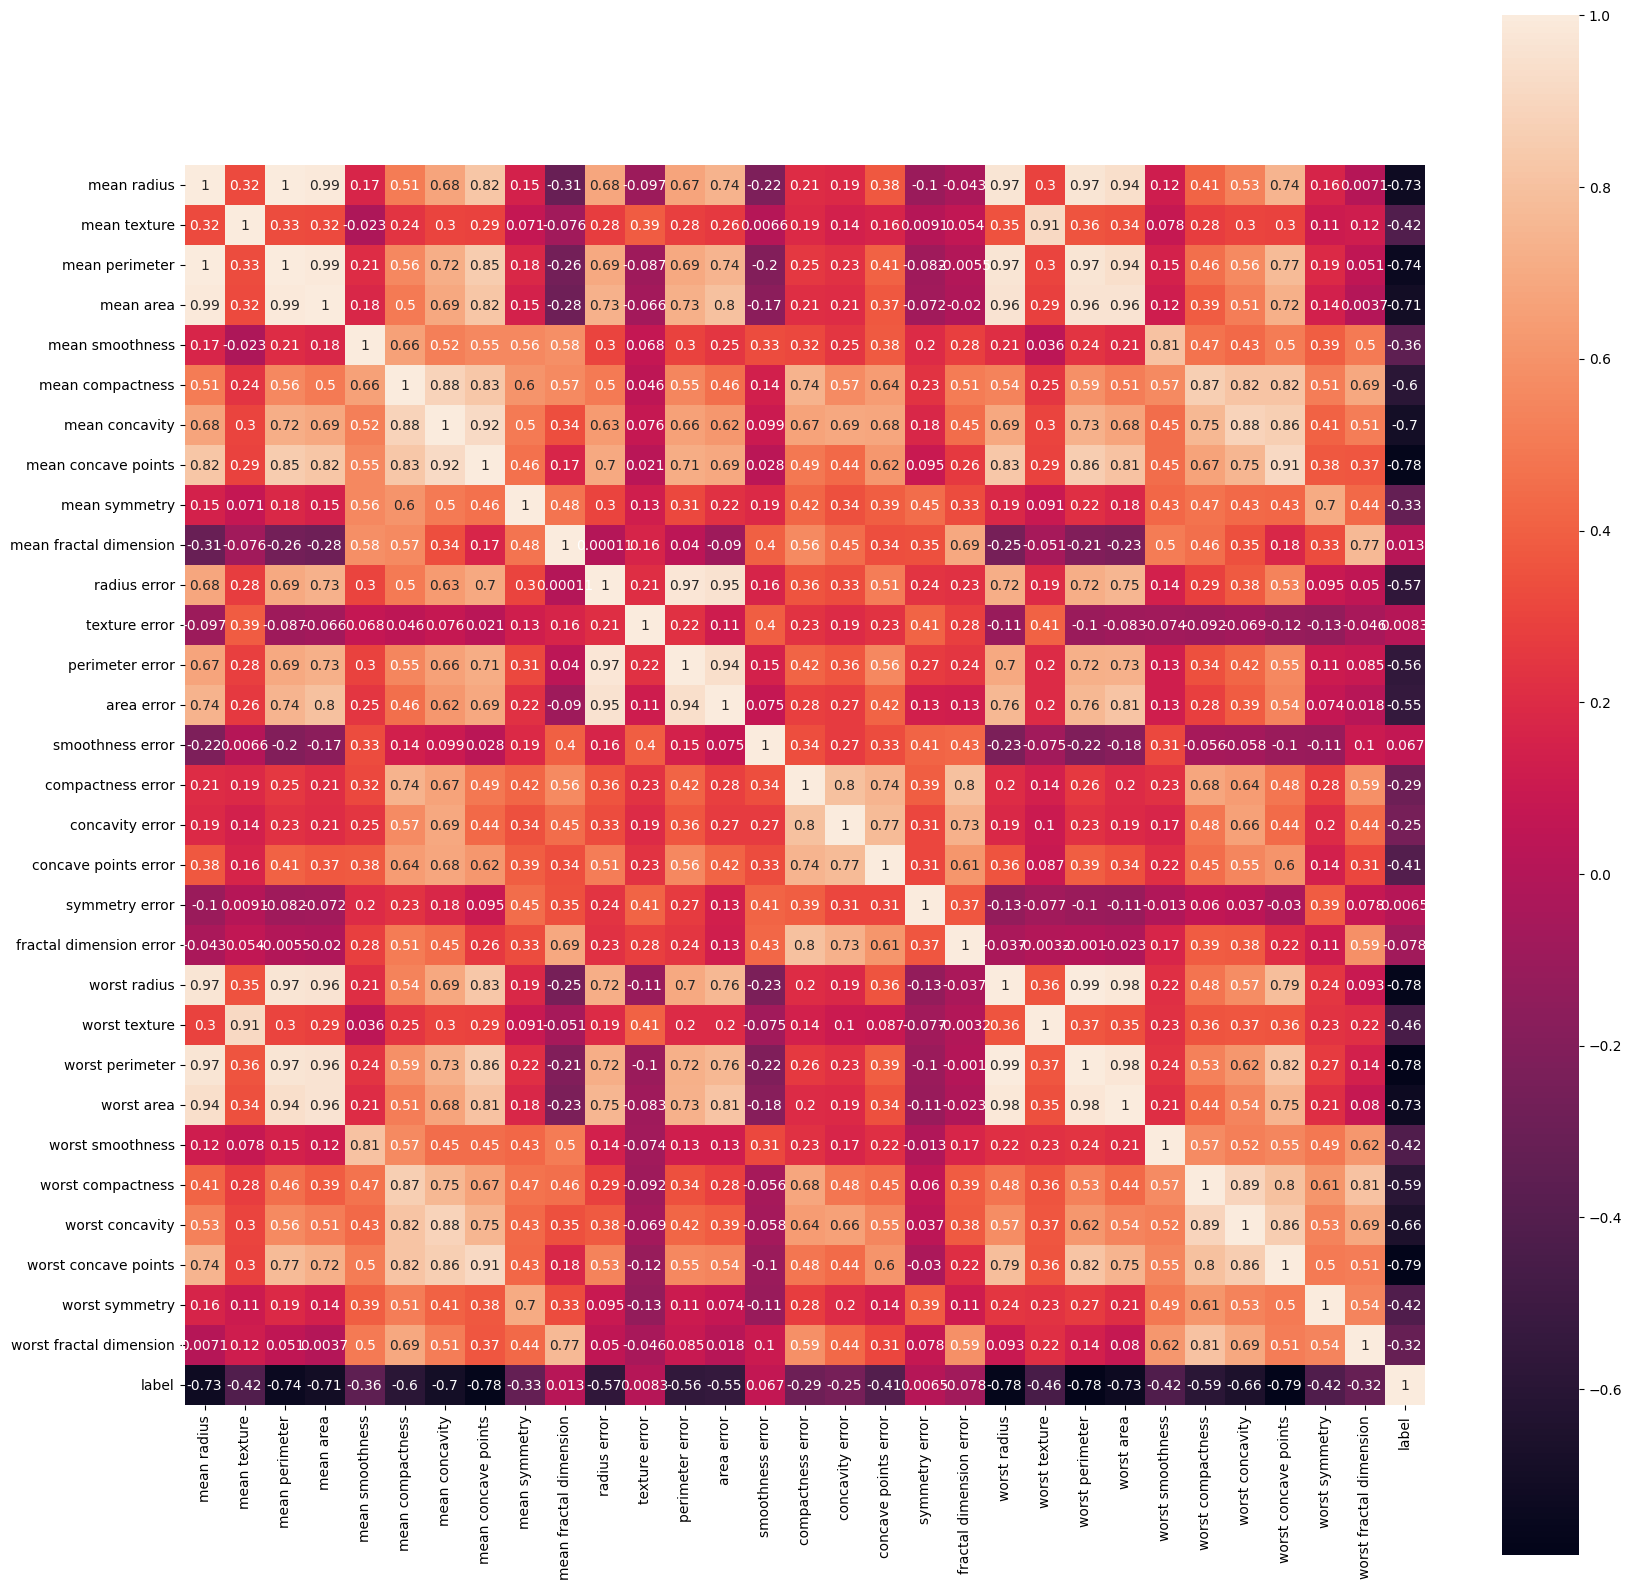

In [10]:
# HeatMap 
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, square=True)
plt.show()

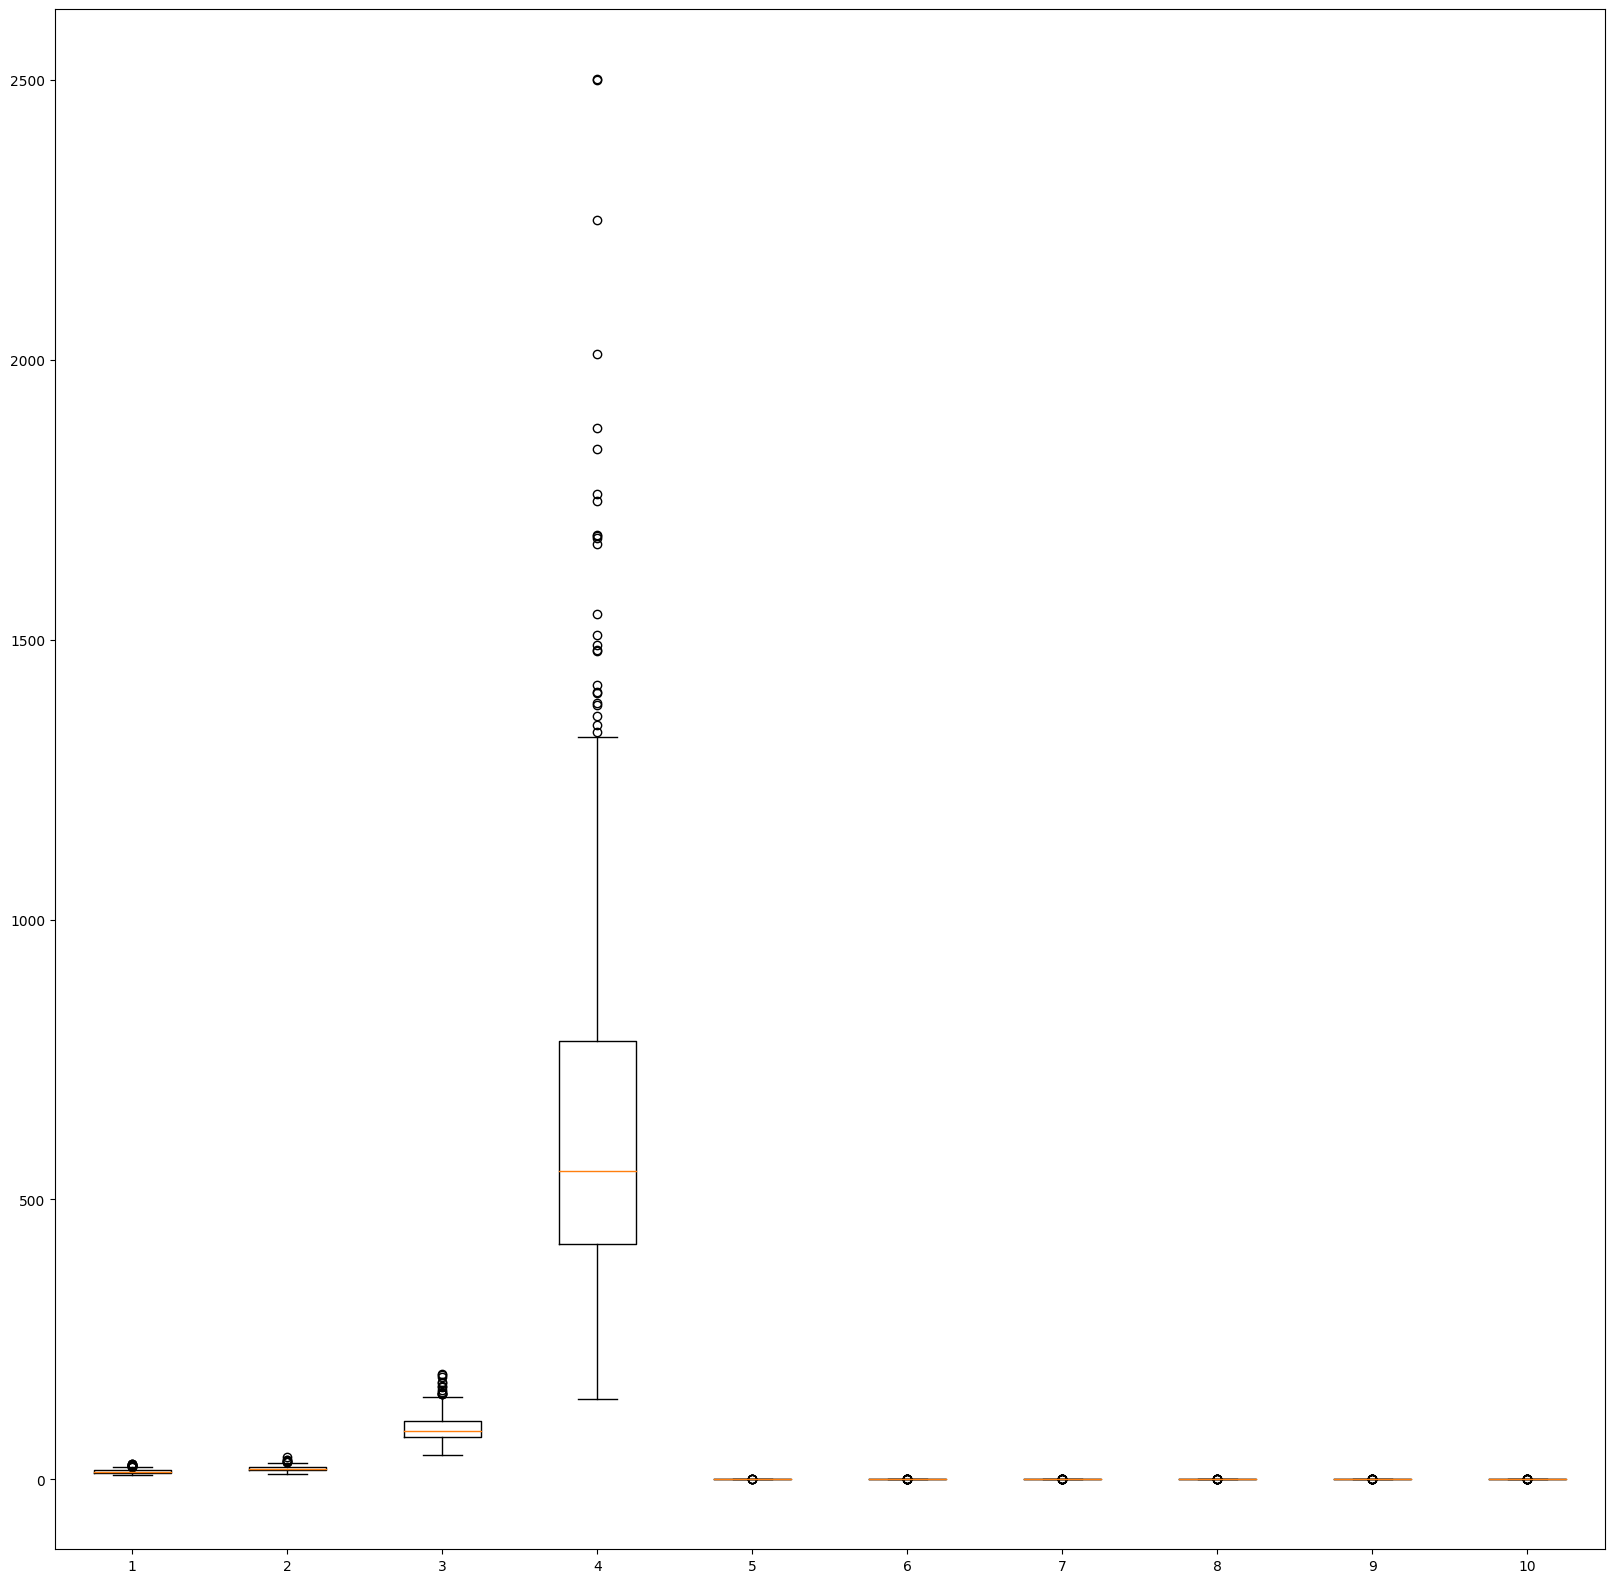

In [11]:
plt.figure(figsize=(20, 20))
plt.boxplot(data.iloc[:, 0:10]);

## Data Preprocessing

### Make Over Smapling 

In [12]:
x = data.drop(columns="label", axis=1)
y = data["label"]

print(data["label"].value_counts())
new_x, new_y = SMOTE().fit_resample(x, y)

data = pd.DataFrame(pd.concat([new_x, new_y], axis=1))

print(data["label"].value_counts())


label
1    357
0    212
Name: count, dtype: int64
label
0    357
1    357
Name: count, dtype: int64


## Splitting Data

In [13]:
x = data.drop(columns="label", axis=1)
y = data["label"]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

In [14]:
sc = StandardScaler()

x_train_std = sc.fit_transform(x_train)
x_test_std = sc.transform(x_test)

In [15]:
tf.random.set_seed(3)

## Building Model

In [16]:
model = k.models.Sequential()
model.add(k.layers.Flatten(input_shape=(30,)))

model.add(k.layers.Dense(20, activation="relu"))

model.add(k.layers.Dense(2, activation="sigmoid"))

In [17]:
model.compile(optimizer="Adam", 
              loss=k.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

In [18]:
# model.fit(x_train, y_train, epochs=15, validation_split=0.2 ,validation_data=(x_test, y_test))

In [19]:
history = model.fit(x_train_std, y_train, epochs=15, validation_split=0.2 ,validation_data=(x_test_std, y_test))

Epoch 1/15
18/18 [==============================] - 1s 11ms/step - loss: 0.7134 - accuracy: 0.6217 - val_loss: 0.5423 - val_accuracy: 0.7413
Epoch 2/15
18/18 [==============================] - 0s 2ms/step - loss: 0.4406 - accuracy: 0.8249 - val_loss: 0.3500 - val_accuracy: 0.8601
Epoch 3/15
18/18 [==============================] - 0s 2ms/step - loss: 0.3111 - accuracy: 0.8774 - val_loss: 0.2570 - val_accuracy: 0.9231
Epoch 4/15
18/18 [==============================] - 0s 2ms/step - loss: 0.2402 - accuracy: 0.9124 - val_loss: 0.2072 - val_accuracy: 0.9371
Epoch 5/15
18/18 [==============================] - 0s 2ms/step - loss: 0.1985 - accuracy: 0.9370 - val_loss: 0.1790 - val_accuracy: 0.9510
Epoch 6/15
18/18 [==============================] - 0s 2ms/step - loss: 0.1707 - accuracy: 0.9475 - val_loss: 0.1603 - val_accuracy: 0.9441
Epoch 7/15
18/18 [==============================] - 0s 2ms/step - loss: 0.1519 - accuracy: 0.9597 - val_loss: 0.1457 - val_accuracy: 0.9580
Epoch 8/15
18/18 [=

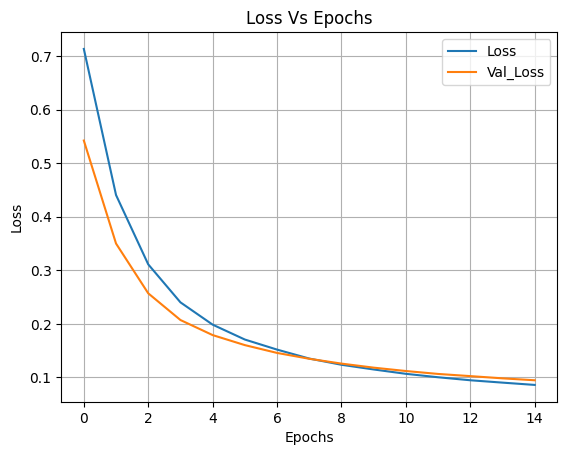

In [20]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Val_Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.title("Loss Vs Epochs")

plt.legend()
plt.grid()

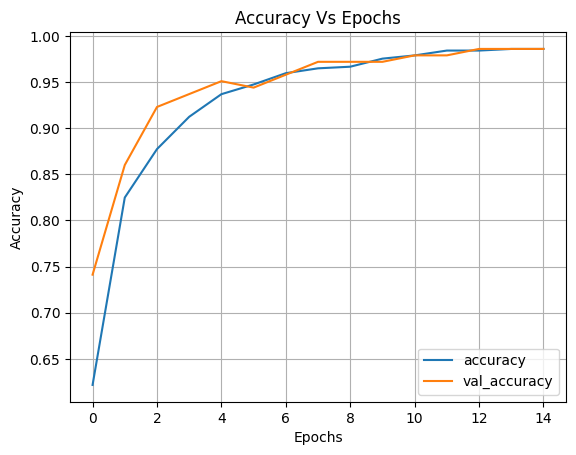

In [21]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.title("Accuracy Vs Epochs")

plt.legend()
plt.grid()

In [22]:
loss, accuracy = model.evaluate(x_test_std, y_test)

print(f"The Accuracy Testing Data is ==> {accuracy} %")
print(f"The loss Testing Data is ==> {loss}")

5/5 [==============================] - 0s 1ms/step - loss: 0.0947 - accuracy: 0.9860
The Accuracy Testing Data is ==> 0.9860140085220337 %
The loss Testing Data is ==> 0.0946619063615799


In [23]:
prediction = model.predict(x_test_std)

5/5 [==============================] - 0s 1ms/step


In [24]:
prediction = [i.argmax() for i in prediction]

In [25]:
print(f"THe accuracy score is ==> {sklearn.metrics.accuracy_score(prediction, y_test)} %")

THe accuracy score is ==> 0.986013986013986 %


### ----------------------------------------------------------------------------------------------------------------------------------------------
### ----------------------------------------------------------------------------------------------------------------------------------------------
### ----------------------------------------------------------------------------------------------------------------------------------------------
### ----------------------------------------------------------------------------------------------------------------------------------------------

## System Prediction

In [26]:
# input_data = np.asarray(list(map(float, input().split()))).reshape(-1, 1)
input_data = np.asarray(data.iloc[48:49, :-1]).reshape(1, -1)

input_data = sc.transform(input_data)

prediction_model = model.predict(input_data)
print("The Prediction is ==> ", prediction_model.argmax())

if prediction_model.argmax() == 1:
    print("The Tumor is Benign")
else:
    print("The tumor is Malignant")

1/1 [==============================] - 0s 14ms/step
The Prediction is ==>  1
The Tumor is Benign


C:\Users\osama\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
